In [2]:
!pip install -q metloom
!pip install -q metpy

In [3]:
 pip install -q plotly==5.9.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
from datetime import datetime
from metloom.pointdata import SnotelPointData

snotel_point = SnotelPointData("713:CO:SNTL", "MyStation")
df = snotel_point.get_daily_data(
    datetime(2020, 1, 2), datetime(2020, 1, 20),
    [snotel_point.ALLOWED_VARIABLES.SWE]
)
print(df)

                                                                        geometry  \
datetime                  site                                                     
2020-01-02 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00000)   
2020-01-03 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00000)   
2020-01-04 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00000)   
2020-01-05 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00000)   
2020-01-06 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00000)   
2020-01-07 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00000)   
2020-01-08 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00000)   
2020-01-09 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00000)   
2020-01-10 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00000)   
2020-01-11 08:00:00+00:00 713:CO:SNTL  POINT Z (-107.71389 37.89168 11080.00

In [54]:
from datetime import datetime
from metloom.pointdata import MesowestPointData

meso_point = MesowestPointData("F9477", "Kamiah")
df = meso_point.get_hourly_data(
    datetime(2021, 12, 28), datetime(2022, 3, 31),
    [meso_point.ALLOWED_VARIABLES.WINDSPEED, meso_point.ALLOWED_VARIABLES.WINDDIRECTION]
)
time = [date.replace(tzinfo=None) for date in df.index.get_level_values('datetime')]

df.index = time
df.index = df.index.rename('time')
ds = xr.Dataset.from_dataframe(df)
ds

<xarray.Dataset>
Dimensions:               (time: 1362)
Coordinates:
  * time                  (time) datetime64[ns] 2021-12-28T06:00:00 ... 2022-...
Data variables:
    WIND SPEED            (time) float64 0.112 0.112 0.112 ... 0.336 0.4475
    geometry              (time) object POINT Z (-115.99233 46.16733 1410) .....
    WIND SPEED_units      (time) object 'm/s' 'm/s' 'm/s' ... 'm/s' 'm/s' 'm/s'
    WIND DIRECTION        (time) float64 262.0 182.0 212.0 ... 288.8 258.0 167.0
    WIND DIRECTION_units  (time) object 'Degrees' 'Degrees' ... 'Degrees'
    datasource            (time) object 'Mesowest' 'Mesowest' ... 'Mesowest'

In [11]:
import act
import numpy as np
import xarray as xr
import datetime

/srv/conda/envs/notebook/lib/python3.10/site-packages/act/plotting/plot.py:80: UserWarning: Could not discern datastreamname and dict or tuple were not provided. Using defaultname of act_datastream!
  warnings.warn(


<PolarAxesSubplot:title={'center':'act_datastream on 20211228'}>

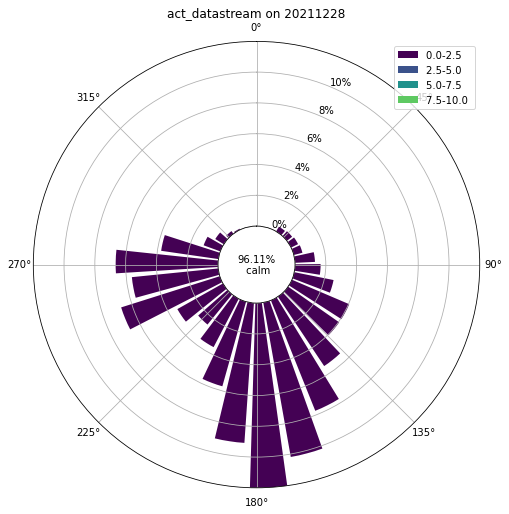

In [57]:

WindDisplay = act.plotting.WindRoseDisplay(ds, figsize=(8, 10), subplot_shape=(1,))
WindDisplay.plot(
    'WIND DIRECTION',
    'WIND SPEED',
    spd_bins=np.linspace(0, 10, 5),
    num_dirs=30,
    tick_interval=2,
    subplot_index=(0,),
)